# **ALP Data Mining Group 17**
## **Bank Dataset**
### Richo Ivan Ardiyanto / 0706022310007
### Jefferson Wesley Liunardi / 0706022310046
### Andrew Hendrawan / 0706022310003


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings(
    "ignore",
    category=DeprecationWarning,
    module="jupyter_client.session"
)

!pip install mlxtend==0.23.1

**Bank Marketing Dataset Info**

Bank Marketing Dataset

The dataset used in this analysis is the Bank Marketing Dataset, which contains information about customer characteristics and bank marketing interaction history. This dataset is used to analyze the relationships between customer attributes using the Association Rules Mining method.

Attribute Description

Demographic Attributes

age: Customer age

job: Customer's occupation type

marital: Marital status

education: Education level

Financial Attributes

balance: Average customer account balance

housing: Home loan ownership status

loan: Personal loan ownership status

default: Credit default status

Marketing Interaction Attributes

contact: Type of communication contact used

day: Day of the last contact

month: Month of the last contact

duration: Duration of the last contact

campaign: Number of contacts performed during the current campaign

pdays: Number of days since the previous contact

previous: Number of previous contacts

poutcome: Outcome of the previous marketing campaign

Target Attribute

deposit: Status of whether the customer subscribed to a term deposit or not

**LOAD DATASET**

In [15]:
# Load dataset from Github
url = "https://raw.githubusercontent.com/Richoivan/Datamining_Richoivan/main/bank.csv"
df = pd.read_csv(url)

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


**Exploratory Data Analysis (EDA)**

With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.

Data Overview
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [16]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [17]:
# Check missing values
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [18]:
# Display unique values for each column in the DataFrame
for col in df.columns:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("-" * 30)

Unique values in column 'age':
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
------------------------------
Unique values in column 'job':
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
------------------------------
Unique values in column 'marital':
['married' 'single' 'divorced']
------------------------------
Unique values in column 'education':
['secondary' 'tertiary' 'primary' 'unknown']
------------------------------
Unique values in column 'default':
['no' 'yes']
------------------------------
Unique values in column 'balance':
[2343   45 1270 ... 1594 2593 -134]
------------------------------
Unique values in column 'housing':
['yes' 'no']
------------------------------
Unique values in colum

Berdasarkan hasil pengecekan missing value, seluruh atribut dalam dataset memiliki nilai lengkap tanpa data hilang. Oleh karena itu, tidak diperlukan proses penanganan missing value, dan tahap data preparation dapat difokuskan pada transformasi data yang relevan untuk Association Rules Mining.

In [19]:
# Copy dataframe
df_bin = df.copy()

# Binning on numerical columns
df_bin['age_group'] = pd.cut(
    df_bin['age'],
    bins=[0, 30, 45, 60, 100],
    labels=['young', 'adult', 'middle_age', 'senior']
)

df_bin['balance_group'] = pd.cut(
    df_bin['balance'],
    bins=[-float('inf'), 0, 1000, float('inf')],
    labels=['low', 'medium', 'high']
)

df_bin['campaign_group'] = pd.cut(
    df_bin['campaign'],
    bins=[0, 2, 5, float('inf')],
    labels=['few', 'medium', 'many']
)

df_bin['pdays_group'] = df_bin['pdays'].apply(
    lambda x: 'not_contacted' if x == -1 else 'contacted_before'
)

df_bin['previous_group'] = df_bin['previous'].apply(
    lambda x: 'no_previous_contact' if x == 0 else 'previous_contact'
)

# Preview the binning results
df_bin[['age_group', 'balance_group', 'campaign_group',
        'pdays_group', 'previous_group']].head()


,age_group,balance_group,campaign_group,pdays_group,previous_group
0,middle_age,high,few,not_contacted,no_previous_contact
1,middle_age,medium,few,not_contacted,no_previous_contact
2,adult,high,few,not_contacted,no_previous_contact
3,middle_age,high,few,not_contacted,no_previous_contact
4,middle_age,medium,few,not_contacted,no_previous_contact


Binning dilakukan untuk mengubah atribut numerik menjadi kategori agar dapat diperlakukan sebagai item dalam Association Rules Mining. Selain itu, binning membantu menyederhanakan data, mengurangi kompleksitas nilai numerik, dan memudahkan interpretasi pola keterkaitan antar karakteristik nasabah.

**Customer Profile Patterns**

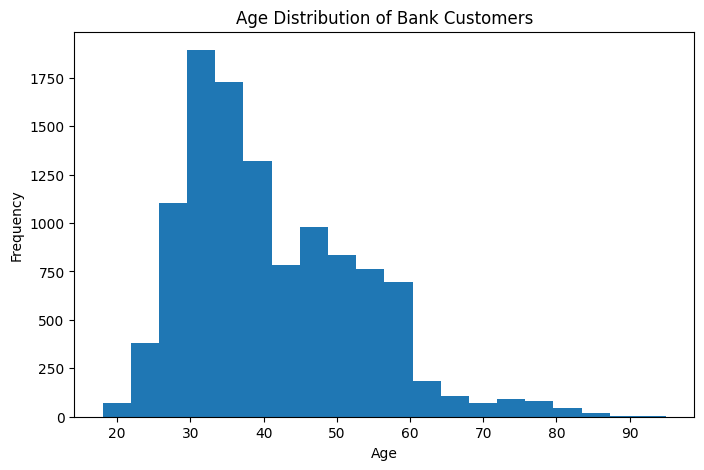

In [20]:
# Histogram plot visualize the age distribution of bank customers
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=20)
plt.title('Age Distribution of Bank Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution visualization shows that most bank customers fall within the productive age range, particularly between 25 and 45 years. Customer frequency declines as age increases, with relatively fewer elderly customers. This pattern indicates that the bank’s services and marketing campaigns primarily target productive-age individuals, who are more likely to have higher financial activity.

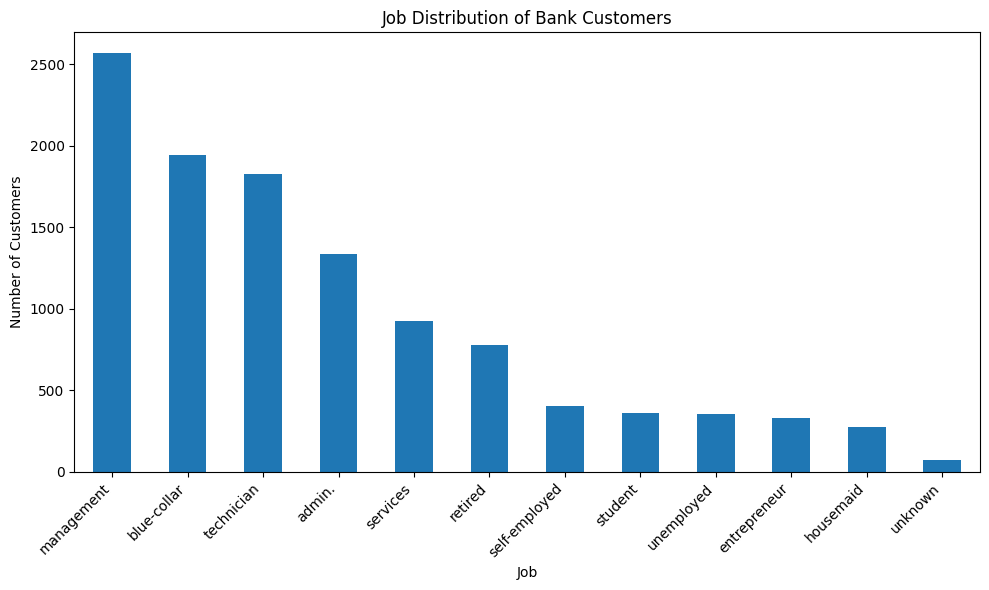

In [21]:
# Bar chart to visualize the job distribution of bank customers
job_counts = df['job'].value_counts()

plt.figure(figsize=(10,6))
job_counts.plot(kind='bar')
plt.title('Job Distribution of Bank Customers')
plt.xlabel('Job')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This visualization shows that most bank customers come from the management, blue-collar, and technician job categories. In contrast, job categories such as housemaid and unknown have relatively few customers. This distribution indicates that the bank’s customer base is dominated by specific occupational groups, which may influence the patterns and relationships identified in the Association Rules Mining analysis.

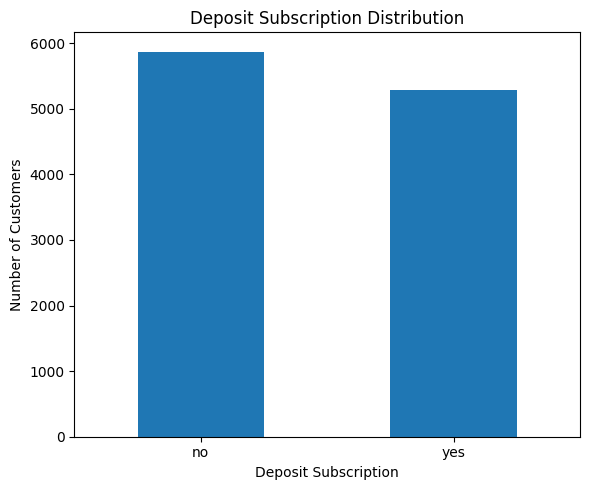

In [22]:
# Bar chart to visualize the distribution of deposit subscriptions

deposit_counts = df['deposit'].value_counts()

plt.figure(figsize=(6,5))
deposit_counts.plot(kind='bar')
plt.title('Deposit Subscription Distribution')
plt.xlabel('Deposit Subscription')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This visualization shows that the number of customers who do not subscribe to deposits is higher than those who do. This information is important as an initial overview before performing Association Rules Mining, particularly for analyzing patterns in customer characteristics that may influence deposit subscription decisions.

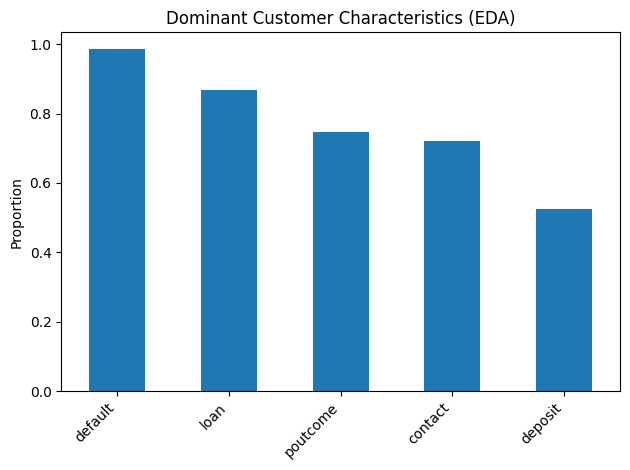

In [23]:
# Visualize the most dominant categories across selected categorical features using proportional frequency
eda_cols = ['default', 'loan', 'poutcome', 'contact', 'deposit']

# Calculate the proportion of the most frequent category in each column
top_items = (
    df[eda_cols]
    .apply(lambda x: x.value_counts(normalize=True).iloc[0])
    .sort_values(ascending=False)
)

# Select top 5 dominant characteristics
top_items = top_items.head(5)

# Plot the results
plt.figure()
top_items.plot(kind='bar')
plt.title('Dominant Customer Characteristics (EDA)')
plt.ylabel('Proportion')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This visualization highlights the items with the highest support values, representing the customer characteristics that appear most frequently in the dataset, such as having no loans and not having been previously contacted. This information provides an important initial overview prior to performing Association Rules Mining to analyze patterns and relationships among customer characteristics.

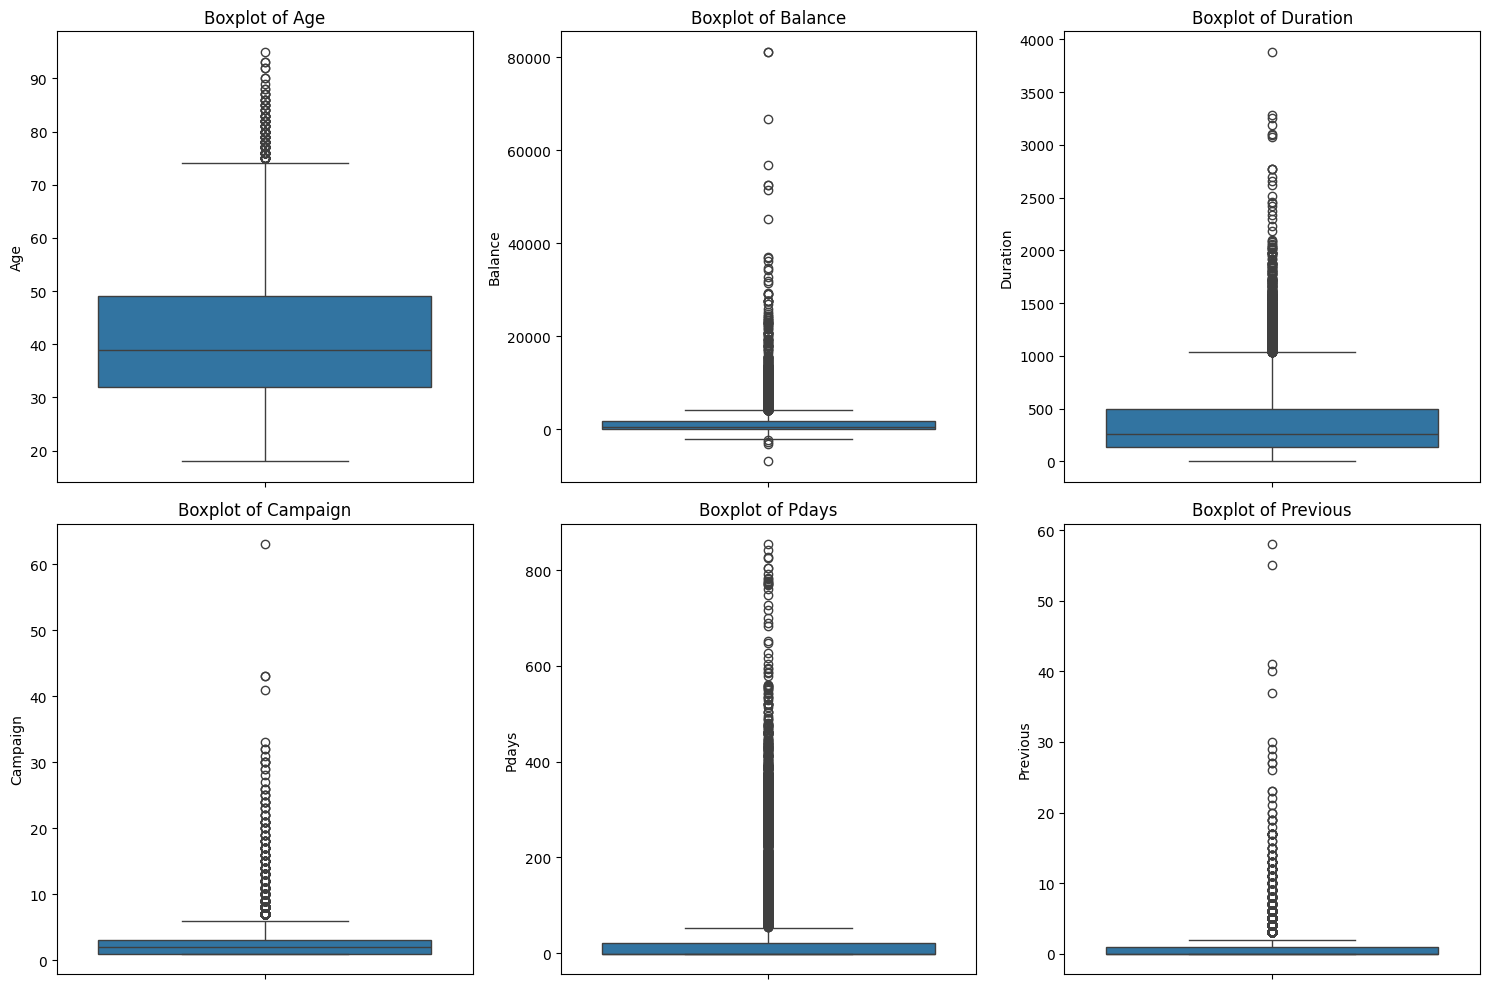

In [24]:
# Visualize the distribution and outliers of numerical attributes using boxplots
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
plt.tight_layout()
plt.show()

The boxplots show that most customers fall within typical ranges for each numeric variable, with several extreme outliers present. Age is mainly concentrated between 30 and 50 years, while a few older customers appear as outliers. Account balances are generally low, but a small number of customers have very high balances, indicating a positively skewed distribution.

Call duration and the number of contacts in the current campaign are usually low to moderate, though some customers have exceptionally long calls or frequent contacts. Historical contact variables (pdays and previous) also show low values for most customers, with a few notable outliers. Overall, the data reflects diverse customer behavior, highlighting the importance of outlier handling and customer segmentation in analysis.

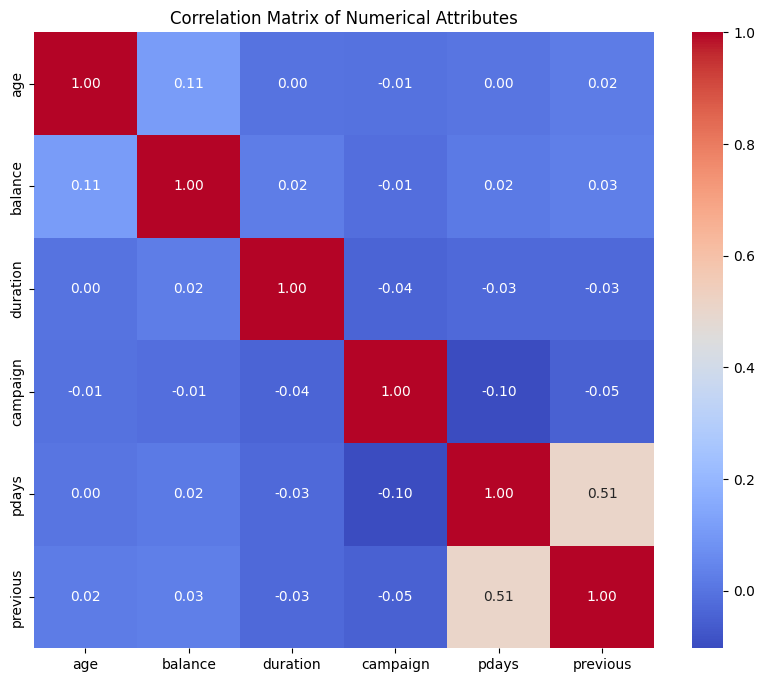

In [25]:
# Visualize the linear relationships between numerical attributes using a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

This correlation matrix visualizes the strength and direction of relationships among the numerical attributes in the dataset. Overall, most variables show very weak correlations, indicating that they are largely independent of one another. The strongest relationship appears between pdays and previous (correlation ≈ 0.51), suggesting that customers who were contacted previously tend to have a shorter time since the last contact. Other attributes such as age, balance, duration, and campaign exhibit near-zero correlations, implying minimal linear association between them. This indicates low multicollinearity among most numerical features, which is beneficial for further modeling and analysis, as each variable contributes relatively distinct information to the dataset.

**ENCODING**

In [26]:
# Prepare a transaction matrix with one-hot encoding for Association Rules Mining
df_transactions = df_bin.copy()

# Select columns used for association analysis
cols_for_association = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'poutcome', 'deposit',
    'age_group', 'balance_group', 'campaign_group',
    'pdays_group', 'previous_group'
]

# Apply one-hot encoding to create a boolean transaction matrix
df_transactions = pd.get_dummies(
    df_transactions[cols_for_association],
    prefix_sep='='
).astype(bool)

# Preview the transformed data
df_transactions.head()


,job=admin.,job=blue-collar,job=entrepreneur,job=housemaid,job=management,job=retired,job=self-employed,job=services,job=student,job=technician,...,balance_group=low,balance_group=medium,balance_group=high,campaign_group=few,campaign_group=medium,campaign_group=many,pdays_group=contacted_before,pdays_group=not_contacted,previous_group=no_previous_contact,previous_group=previous_contact
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False


**MODEL COMPLEXITY TRAINING**

In [27]:
# Evaluate the impact of different support and confidence thresholds on frequent itemsets and rule generation
def evaluate_support_confidence(
    df_transactions,
    support_values,
    confidence_values,
    max_len=2
):
    results = []

    for sup in support_values:

        frequent_itemsets = apriori(
            df_transactions,
            min_support=sup,
            use_colnames=True,
            max_len=max_len
        )

        for conf in confidence_values:
            if frequent_itemsets.empty:
                rules_count = 0
            else:
                rules = association_rules(
                    frequent_itemsets,
                    metric="confidence",
                    min_threshold=conf
                )
                rules_count = len(rules)

            results.append({
                "min_support": sup,
                "min_confidence": conf,
                "frequent_itemsets_count": len(frequent_itemsets),
                "rules_count": rules_count
            })

    return pd.DataFrame(results)


In [28]:
# Test different combinations of support and confidence thresholds for Association Rules Mining
support_values = [0.02, 0.03, 0.05]
confidence_values = [0.6, 0.7, 0.8]

results_grid = evaluate_support_confidence(
    df_transactions,
    support_values,
    confidence_values
)

results_grid


,min_support,min_confidence,frequent_itemsets_count,rules_count
0,0.02,0.6,880,409
1,0.02,0.7,880,327
2,0.02,0.8,880,193
3,0.03,0.6,733,366
4,0.03,0.7,733,288
5,0.03,0.8,733,171
6,0.05,0.6,556,323
7,0.05,0.7,556,261
8,0.05,0.8,556,152


Main reasons for parameter selection:

A support value of 0.02 is chosen because it allows the model to capture a wider range of frequent patterns without being overly restrictive. This threshold ensures that meaningful but less frequent customer behavior patterns are still included in the analysis, which is important given the diversity of customer characteristics in the dataset.

A confidence threshold of 0.7 is selected to maintain the strength and reliability of the generated association rules. By setting confidence at this level, the resulting rules demonstrate a strong conditional relationship between antecedents and consequents, reducing the risk of producing weak or misleading associations.

The combination of these parameters results in a balanced and informative number of rules, avoiding situations where too many low-quality rules are generated or where overly strict thresholds eliminate potentially valuable insights. This balance improves the interpretability of the results and supports more effective decision-making.

Additionally, the selected parameters ensure that the model remains computationally stable and efficient. The Apriori process can be computationally expensive at lower support thresholds; therefore, choosing support 0.02 and confidence 0.7 provides an optimal trade-off between analytical depth and computational performance, making the model suitable for practical use.

## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [29]:
# Create a transaction–item basket for Association Rules Mining
# Using one-hot encoded boolean data
basket = df_transactions.copy()

basket.head()


,job=admin.,job=blue-collar,job=entrepreneur,job=housemaid,job=management,job=retired,job=self-employed,job=services,job=student,job=technician,...,balance_group=low,balance_group=medium,balance_group=high,campaign_group=few,campaign_group=medium,campaign_group=many,pdays_group=contacted_before,pdays_group=not_contacted,previous_group=no_previous_contact,previous_group=previous_contact
0,True,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,True,False
1,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,False,False,False,True,True,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,False,False,True,True,False
4,True,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,True,False


In [30]:
# Generate frequent itemsets from the transaction basket using a minimum support of 0.02
frequent_itemsets = apriori(
    basket,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets


,support,itemsets
0,0.119513,(job=admin.)
1,0.174162,(job=blue-collar)
2,0.029385,(job=entrepreneur)
3,0.024548,(job=housemaid)
4,0.229887,(job=management)
...,...,...
136685,0.021502,"(campaign_group=few, deposit=no, age_group=adu..."
136686,0.020068,"(campaign_group=few, deposit=no, age_group=adu..."
136687,0.020337,"(campaign_group=few, deposit=no, age_group=adu..."
136688,0.020337,"(campaign_group=few, deposit=no, month=may, co..."


In [31]:
# Limit itemset length to 2, generate association rules with confidence ≥ 0.7, and filter by lift ≥ 1
frequent_itemsets = frequent_itemsets.copy()
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
frequent_itemsets = frequent_itemsets[frequent_itemsets['length'] <= 2]

# Generate association rules
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.7
)

# Filter rules with lift ≥ 1 and display top 10 by lift
rules = rules[rules['lift'] >= 1]

rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33,(age_group=senior),(job=retired),0.054739,0.069701,0.041301,0.754501,10.824856,0.037485,3.789419,0.960180
54,(job=student),(age_group=young),0.032252,0.179806,0.027325,0.847222,4.711856,0.021526,5.368539,0.814024
279,(poutcome=success),(pdays_group=contacted_before),0.095951,0.254256,0.095951,1.000000,3.933051,0.071555,inf,0.824893
280,(poutcome=success),(previous_group=previous_contact),0.095951,0.254256,0.095951,1.000000,3.933051,0.071555,inf,0.824893
272,(poutcome=failure),(pdays_group=contacted_before),0.110016,0.254256,0.110016,1.000000,3.933051,0.082044,inf,0.837930
273,(poutcome=failure),(previous_group=previous_contact),0.110016,0.254256,0.110016,1.000000,3.933051,0.082044,inf,0.837930
323,(pdays_group=contacted_before),(previous_group=previous_contact),0.254256,0.254256,0.254256,1.000000,3.933051,0.189610,inf,1.000000
324,(previous_group=previous_contact),(pdays_group=contacted_before),0.254256,0.254256,0.254256,1.000000,3.933051,0.189610,inf,1.000000
275,(poutcome=other),(pdays_group=contacted_before),0.048110,0.254256,0.048110,1.000000,3.933051,0.035878,inf,0.783435
276,(poutcome=other),(previous_group=previous_contact),0.048110,0.254256,0.048110,1.000000,3.933051,0.035878,inf,0.783435


**Insights, Interpretations and Conclusions**

The association rules mining process successfully uncovers meaningful patterns in customer characteristics and behaviors, providing a strong foundation for data-driven decision-making. The analysis offers both general insights about the customer base and specific actionable recommendations derived from the strongest rules.

1. Customer Segmentation by Age and Job
The model confirms a strong link between age and occupation. For example, most senior customers are retired, and students are predominantly young. This indicates that demographic attributes are highly predictive of financial behaviors, enabling precise customer segmentation for targeted services. Financial products and campaigns can be customized according to age and occupation to maximize engagement and relevance.

2. Behavioral Patterns in Marketing Response
Customers with prior contact history are more likely to respond positively to campaigns, while non-responders are often still previously contacted. This suggests that engagement history is a critical predictor of marketing success. The bank can leverage this information to prioritize follow-ups and optimize campaign timing and methods.

3. High-Frequency Customer Characteristics
Dominant characteristics, such as having no loans or prior contact, represent patterns that occur most frequently in the dataset. Identifying these common behaviors helps the bank focus on operational planning, product design, and service delivery for the majority of its customers.

4. Effectiveness of Prior Contact in Conversion
The bidirectional relationship between prior contact status and recency demonstrates that both historical and temporal aspects of customer interactions influence responsiveness. Understanding this relationship allows the bank to optimize communication frequency, scheduling, and strategy to improve conversion rates.

5. Actionable Insights from Specific Association Rules

Rule 1: (age_group = senior) → (job = retired)
Insight: Most senior customers are retired, with the highest lift, indicating a consistent and dominant pattern.
Recommendation: Design tailored products for retirees, such as flexible-term deposits, priority banking services, and loyalty programs focused on security and stability.

Rule 2: (job = student) → (age_group = young)
Insight: Students are almost entirely young, reflecting clear demographic segmentation.
Recommendation: Offer student-oriented products, like fee-free savings accounts, digital banking tools, and social media-based promotions.

Rule 3: (poutcome = success) → (pdays_group = contacted_before)
Insight: Positive campaign responders had been contacted before, showing prior engagement predicts success.
Recommendation: Prioritize customers with a history of previous contact for marketing campaigns to increase conversion probability.

Rule 4: (poutcome = failure) → (previous_group = previous_contact)
Insight: Non-responders were still previously contacted, indicating that mere contact is insufficient.
Recommendation: Reevaluate marketing strategies for this segment, including timing, channels, and offer types, to improve campaign effectiveness.

Rule 5: (previous_group = previous_contact) ↔ (pdays_group = contacted_before)
Insight: A strong bidirectional relationship exists between prior contact and recency.
Recommendation: Use historical contact data as a core feature in segmentation models to optimize communication frequency and strategy.

6. Balanced and Informative Rules
By selecting support = 0.02 and confidence = 0.7, the model generates a manageable number of strong, interpretable rules. Filtering by lift ≥ 1 ensures the rules reflect genuine, non-random associations, enhancing the quality of insights.

7. Strategic Implications for CRM and Product Development
The findings can directly inform CRM strategies, including prioritization of high-probability converters, personalized offers, and optimized communication schedules. Additionally, patterns in the data reveal opportunities for product differentiation, such as special deposit schemes for retirees or flexible savings for students.

Conclusion
The model demonstrates high practical utility. It not only uncovers descriptive patterns but also provides actionable insights for marketing, customer segmentation, and product development. By integrating demographic, behavioral, and historical interaction data, the bank can make more informed, targeted, and effective decisions, maximizing engagement and customer satisfaction.